# PERKENALAN DIRI

- Aldo Dwicahyo
- Batch-004

In [69]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.mixture import GaussianMixture 
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.base import clone 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.patches as mpatches

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [70]:
df = pd.read_csv('train.csv')

- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [71]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [72]:
df.shape

(103904, 25)

# Data Cleaning

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

nama pada kolom mengandung banyak sekali spasi karakter yang bisa menyulitkan pemanggilan data kedepannya, saya akan melakukan adjustment terhadap masalah ini dengan mangganti nama dengan apa yang menurut saya mudah untuk dipanggil

In [74]:
df = df.rename(columns={
    'Customer Type' : 'Cust_type',
    'Type of Travel' : 'travel_type',
    'Flight Distance' : 'distance',
    'Inflight wifi service' : 'wifi',
    'Departure/Arrival time convenient' : 'time',
    'Ease of Online booking' : 'easy_access',
    'Gate location' : 'gate_location',
    'Food and drink' : 'food_drink',
    'Online boarding' : 'online_boarding',
    'Seat comfort' : 'seat_comfort',
    'Inflight entertainment' : 'entertainment',
    'On-board service' : 'flight_service',
    'Leg room service' : 'leg_room',
    'Baggage handling' : 'baggage',
    'Checkin serivice' : 'checkin',
    'Inflight service' : 'inflight',
    'Cleanliness' : 'cleanliness',
    'Departure Delay in Minutes' : 'departure_delay',
    'Arrival Delay in Minutes' : 'arrival_delay'
})

In [75]:
df.isnull().mean()*100

Unnamed: 0         0.000000
id                 0.000000
Gender             0.000000
Cust_type          0.000000
Age                0.000000
travel_type        0.000000
Class              0.000000
distance           0.000000
wifi               0.000000
time               0.000000
easy_access        0.000000
gate_location      0.000000
food_drink         0.000000
online_boarding    0.000000
seat_comfort       0.000000
entertainment      0.000000
flight_service     0.000000
leg_room           0.000000
baggage            0.000000
Checkin service    0.000000
inflight           0.000000
cleanliness        0.000000
departure_delay    0.000000
arrival_delay      0.298352
satisfaction       0.000000
dtype: float64

Terdapat 0.2% Missing Values pada kolom `arrival_delay`, asumsi pribadi saya jika ingin filling missing value pada kolom tersebut, harusnya kolom arrival_delay dapat dipengaruhi oleh departure_delay, asumsi ini bisa tercetus karena jika pesawat mengalami keterlambatan terbang, seharusnya pesawat juga mengalami keterlambatan kedatangan

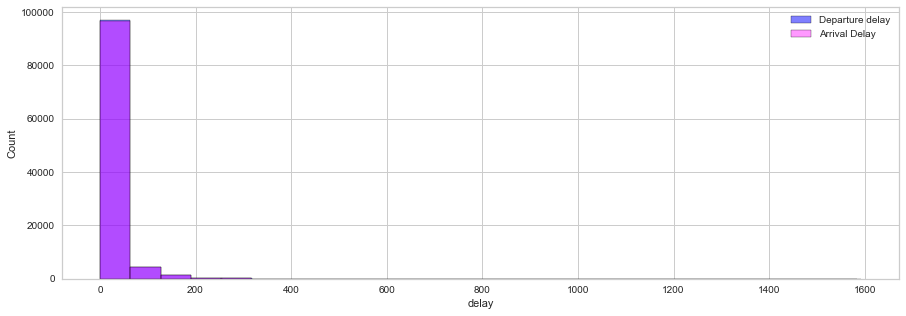

In [76]:
plt.figure(figsize=(15,5))

sns.histplot(df['departure_delay'], color ='blue',bins=25,alpha=0.5, label='Departure delay')
sns.histplot(df['arrival_delay'], color='magenta', bins=25,alpha=0.4, label='Arrival Delay')
plt.xlabel('delay')
plt.legend()
plt.show()

In [77]:
print(f'nilai korelasi antara arival dan departure adalah {round(df.arrival_delay.corr(df.departure_delay)*100,2)} %')

nilai korelasi antara arival dan departure adalah 96.55 %


dilihat dari grafik dan nilai korelasi yang tinggi yang berarti ini masuk kedalam katergori `Missing Completely at Random`, asumsi bahwa arrival delay dan departure adalah sama. mari lihat null values pada arrival dengan melihat juga nilai departure delaynya

In [78]:
null = df[df['arrival_delay'].isnull()]

In [79]:
null[['departure_delay', 'arrival_delay']]

,departure_delay,arrival_delay
213,31,NaN
1124,38,NaN
1529,11,NaN
2004,41,NaN
2108,1,NaN
...,...,...
102067,230,NaN
102384,55,NaN
102552,0,NaN
102960,0,NaN


<AxesSubplot:xlabel='departure_delay', ylabel='Count'>

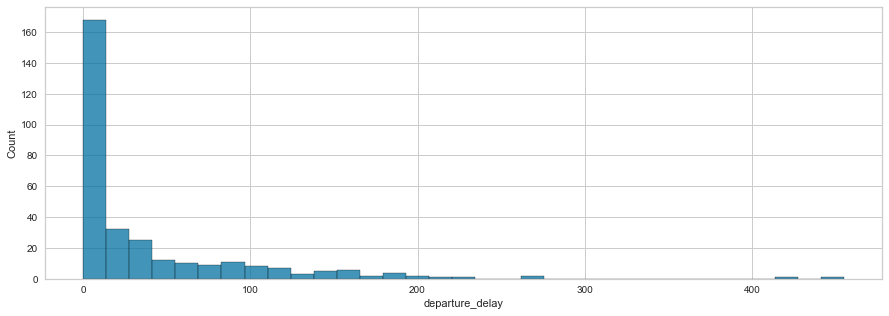

In [80]:
plt.figure(figsize=(15,5))

sns.histplot(null['departure_delay'])

data diatas adalah data departure delay yang missing valuesnya adalah null, dapat diketahui dari grafik diatas nilai arrival yang null berkemungkinan besar adalah `data yang tidak/lupa terecord selama data colecting berlangsung`, hal ini dapat didukung juga dengan distribusi yang hampir mirip dengan keseluruhan data.

Dari hasil pengamatan di atas, dengan mempertimbangkan persentasi dari data yang null pada `arrival_delay`. Langkah yang saya ambil adalah untuk `menghilangkan` data dengan arrival delay null

In [81]:
df = df.dropna(subset=['arrival_delay'])
df = df.reset_index()
df = df.drop(['index','Unnamed: 0'], axis=1)
df.head()


,id,Gender,Cust_type,Age,travel_type,Class,distance,wifi,time,easy_access,...,entertainment,flight_service,leg_room,baggage,Checkin service,inflight,cleanliness,departure_delay,arrival_delay,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Step terkahir data clenaing saya mengganti secara manual label/target `satisfied` = `1`, `neutral or dissatisfied` = `0`

In [82]:
df['satisfaction'] = df['satisfaction'].map({
    'satisfied' : 1,
    'neutral or dissatisfied' : 0
})

df.head()

,id,Gender,Cust_type,Age,travel_type,Class,distance,wifi,time,easy_access,...,entertainment,flight_service,leg_room,baggage,Checkin service,inflight,cleanliness,departure_delay,arrival_delay,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


# EDA

## Label Distribution

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

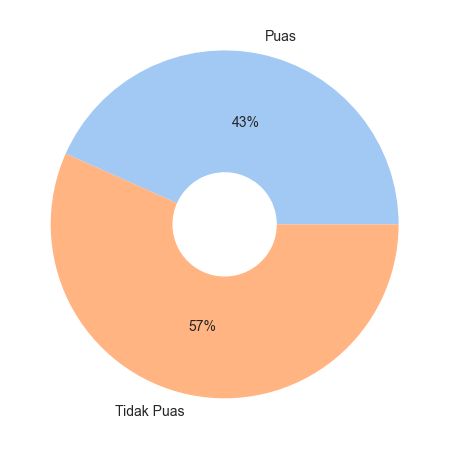

In [83]:
plt.figure(figsize=(8,8))

d1 = df[df["satisfaction"]==1]
d2 = df[df['satisfaction']==0]
colors = sns.color_palette('pastel')[0:5]

label1 = ['Puas', 'Tidak Puas']
values1 = [len(d1), len(d2)]

plt.pie(values1, labels = label1, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=.7), textprops={'fontsize': 14})
plt.xlabel

Dilihat dari grafik diatas, data bisa saya kategorikan data balance karena perbedaan anatara data target tidak terlalu signifikan

## Gender Distribution

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

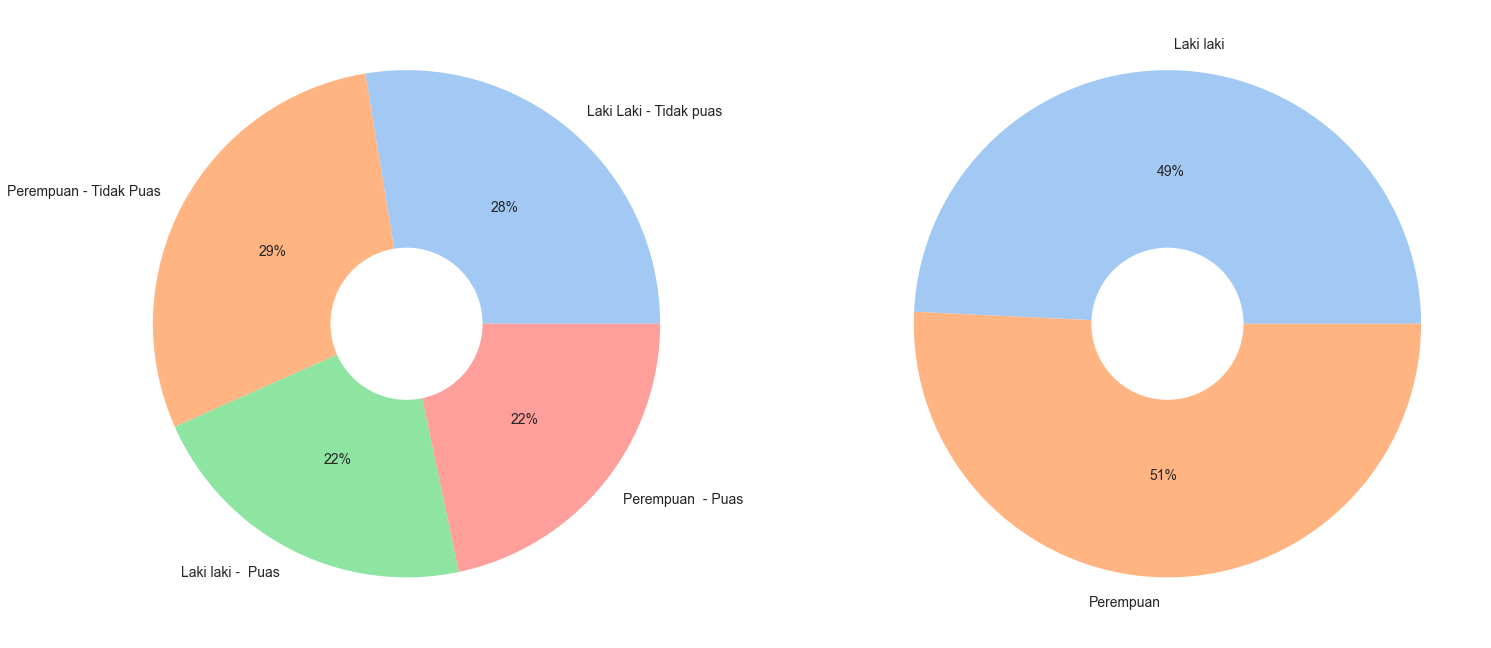

In [84]:
plt.figure(figsize=(25,15))

d1 = df[(df["Gender"]=='Male') & (df["satisfaction"]==0)]
d2 = df[(df["Gender"]=='Female') & (df["satisfaction"]==0)]
d3 = df[(df["Gender"]=='Male') & (df["satisfaction"]==1)]
d4 = df[(df["Gender"]=='Female') & (df["satisfaction"]==1)]

label1 = ["Laki laki","Perempuan"]
label2 = ['Laki Laki - Tidak puas','Perempuan - Tidak Puas', "Laki laki -  Puas", "Perempuan  - Puas"]
label3 = ['Puas', 'Tidak Puas']
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]
values3 = [(len(d1)+len(d2)), (len(d3)+len(d4))]

colors = sns.color_palette('pastel')[0:5]

plt.subplot(121)
plt.pie(values2, labels = label2, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=.7),textprops={'fontsize': 14})
plt.xlabel
plt.subplot(122)
plt.pie(values1, labels = label1, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=0.7), textprops={'fontsize': 14})
plt.xlabel


- Distribusi data gender pada dataset ternyata hampir berimbang dimana ada `49%` penumpang laki laki & `51%` penumpang perempuan
- Distribusi data
- Untuk distribusi jika berdasarkan target, semua gender mempunya porsi yang hampir mirip

## Customer Type

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

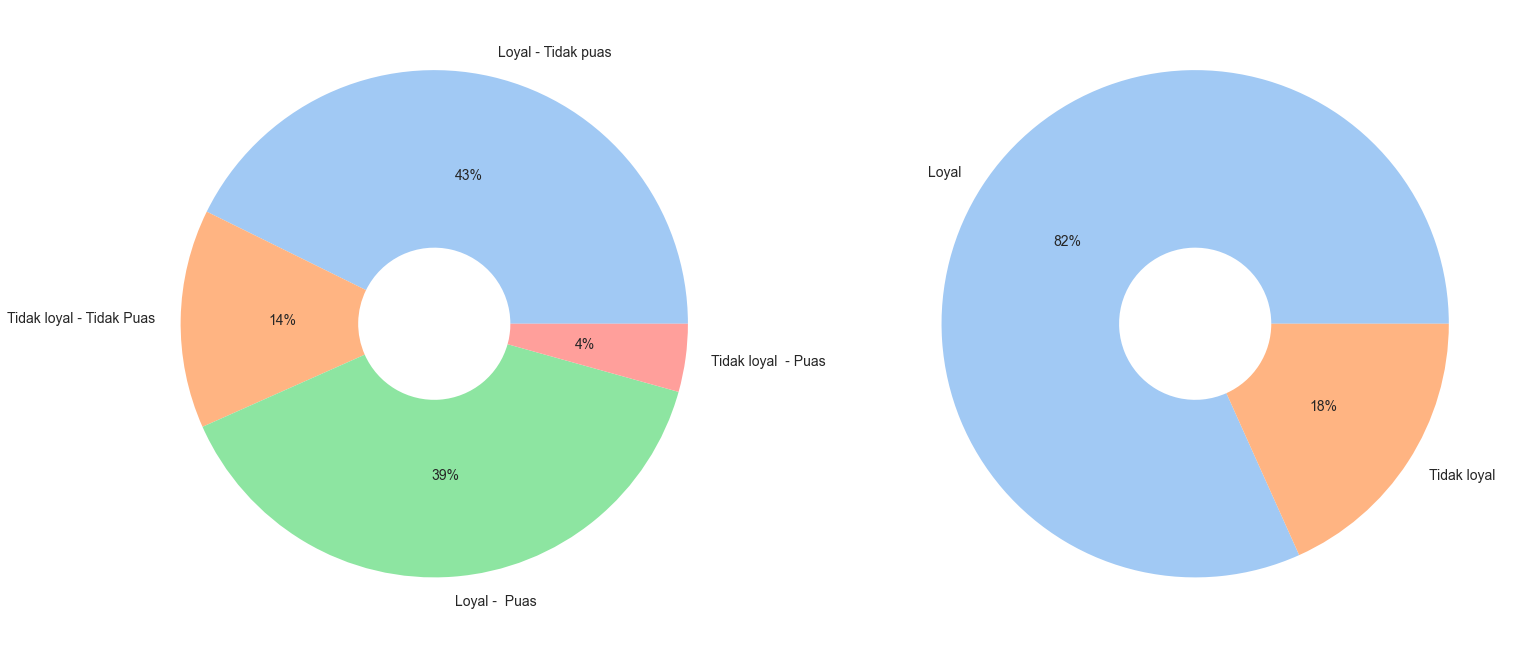

In [85]:
plt.figure(figsize=(25,15))

d1 = df[(df['Cust_type']=='Loyal Customer') & (df["satisfaction"]==0)]
d2 = df[(df["Cust_type"]=='disloyal Customer') & (df["satisfaction"]==0)]
d3 = df[(df["Cust_type"]=='Loyal Customer') & (df["satisfaction"]==1)]
d4 = df[(df["Cust_type"]=='disloyal Customer') & (df["satisfaction"]==1)]

label1 = ["Loyal","Tidak loyal"]
label2 = ['Loyal - Tidak puas','Tidak loyal - Tidak Puas', "Loyal -  Puas", "Tidak loyal  - Puas"]

values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]


colors = sns.color_palette('pastel')[0:5]

plt.subplot(121)
plt.pie(values2, labels = label2, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=.7), textprops={'fontsize': 14})
plt.xlabel
plt.subplot(122)
plt.pie(values1, labels = label1, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=.7), textprops={'fontsize': 14})
plt.xlabel


- Dilihat dari distribusi customer loyal dan tidak loyal, wajar saja jika persentasi Loyal Puas dan tidak puas sangat mendominasi data diatas
- yang dapat menjadi highlight adalah data customer yang tidak loyal dan mereka tidak puas mempunyai nilai yang cukup tinggi

In [86]:
disloyal = df[(df["Cust_type"]=='disloyal Customer') & (df['satisfaction'] == 0)]
disloyal.head()

,id,Gender,Cust_type,Age,travel_type,Class,distance,wifi,time,easy_access,...,entertainment,flight_service,leg_room,baggage,Checkin service,inflight,cleanliness,departure_delay,arrival_delay,satisfaction
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,0
10,34991,Female,disloyal Customer,24,Business travel,Eco,1182,4,5,5,...,2,3,3,5,3,5,2,0,0.0,0
15,100580,Male,disloyal Customer,13,Business travel,Eco,486,2,1,2,...,4,2,1,4,1,3,4,1,0.0,0
31,27809,Female,disloyal Customer,15,Business travel,Eco,1043,2,2,2,...,5,3,1,4,2,4,5,3,0.0,0


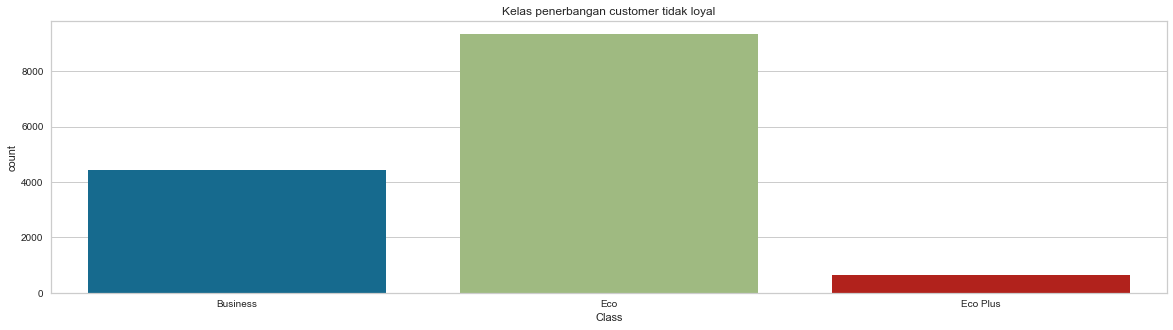

In [87]:
plt.figure(figsize=(20,5))

sns.countplot(data=disloyal, x='Class', label='Disloyal class distribution')
plt.title('Kelas penerbangan customer tidak loyal')
plt.show()

Dilihat persebaran data tidak loyal, kebanyakan dari mereka menaiki kelas Economi yang dimana kelas economi adalah kelas terbawah.

Namun nilai kelas Business memiliki angka yang cukup tinggi juga dibandingkan dengan Eco Plus, yang kita ketahui bersama bahwa Business class adalah Kelas tertinggi yang harusnya memiliki tingkat satisfaction yang tinggi pula

Text(0.5, 1.0, 'Business Class Convinient Time for Disloyal Cust')

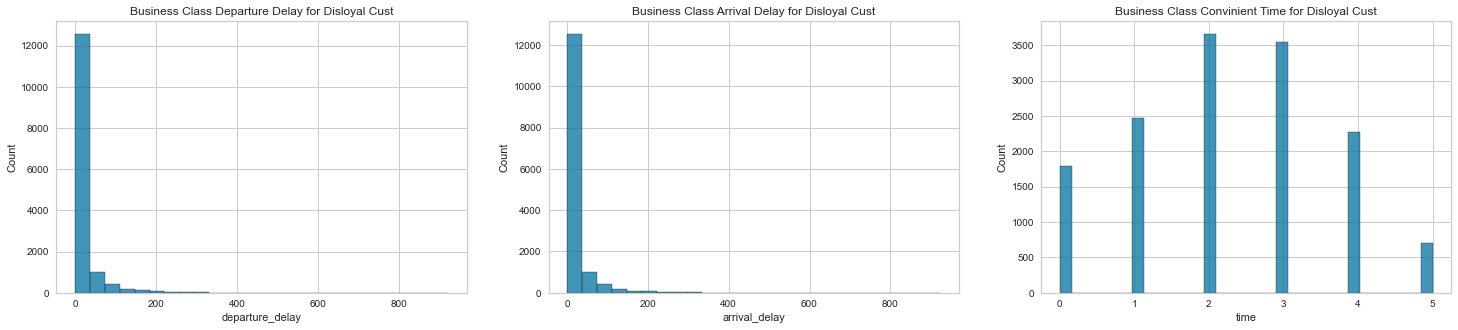

In [88]:
plt.figure(figsize=(25,5))

plt.subplot(131)
sns.histplot(disloyal, x='departure_delay', bins=25)
plt.title('Business Class Departure Delay for Disloyal Cust')

plt.subplot(132)
sns.histplot(disloyal, x='arrival_delay', bins=25)
plt.title('Business Class Arrival Delay for Disloyal Cust')

plt.subplot(133)
sns.histplot(disloyal, x='time')
plt.title('Business Class Convinient Time for Disloyal Cust')

Dari Data diatas, didapati insight bahwa menurut Disloyal Customer Departure/Arrival time Convenient masih kurang bagus, hal ini didapati dari penilaian pada grafik time diatas data paling banyak berada pada nilai 2 yang mengacu pada rata-rata kebawah

## Travel Type Observation

Text(0.5, 0, 'Travel Type')

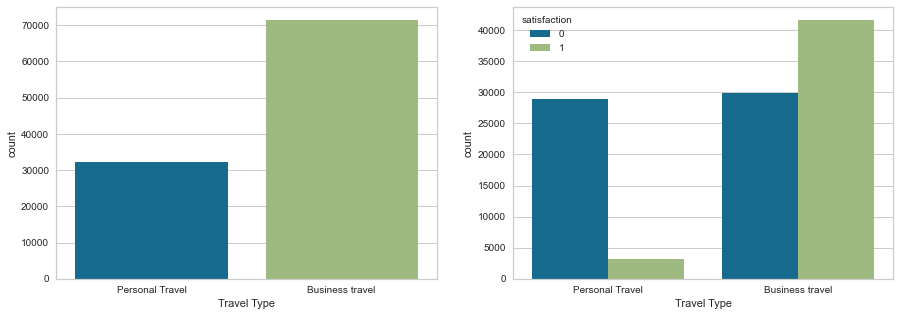

In [89]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(data=df, x='travel_type')
plt.xlabel('Travel Type')

plt.subplot(122)
sns.countplot(data=df, x='travel_type', hue='satisfaction')
plt.xlabel('Travel Type')

dari data travel type yang paling mayoritas, banyak penumpang yang berpergian dengan tujuan bisnis lebih banyak memberikan respon puas dibandingkan dengan yang tidak puas

<AxesSubplot:xlabel='Age', ylabel='count'>

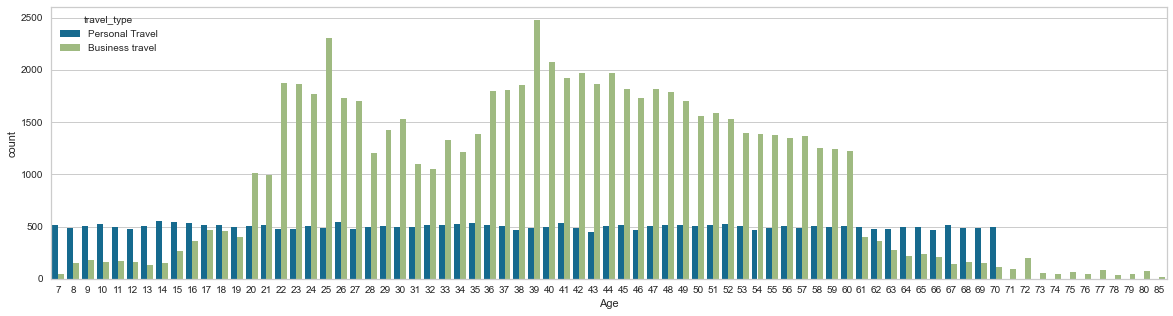

In [90]:
plt.figure(figsize=(20,5))

sns.countplot(data=df, x='Age', hue='travel_type')

Dari distribusi travel type dengan type personal type cenderung hampir sama di semua umur, namun untuk keperluan bisnis banyak terdistribusi pada umur 20 hingga umur 60. Yang dimana umur 20 hingga 60 adalah umur produktif

## Age Observation

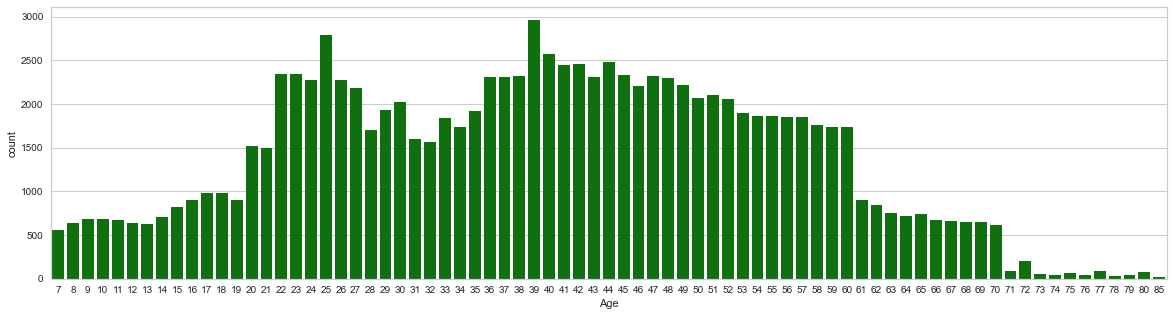

In [91]:
plt.figure(figsize=(20,5))

sns.countplot(data=df, x='Age', color='green')
plt.show()

Distribusi data umur pada data penumpang terlihat terdistribusi secara normal dengan data terbanyak terpusat pada umur 39 dan umur 25

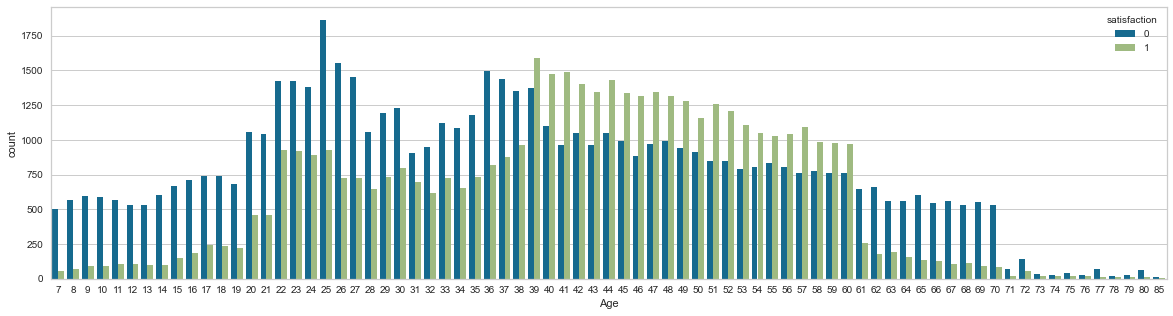

In [92]:
plt.figure(figsize=(20,5))

sns.countplot(data=df, x='Age', hue='satisfaction')
plt.show()

jika dibandingkan satisfaction pada data umur,data dengan sebaran data terbanyak ternyata mempunyai nilai non satisfied cukup tinggi juga

## Satisfaction Level Features

In [93]:
satisLevel = df.columns.tolist()[7:-3]

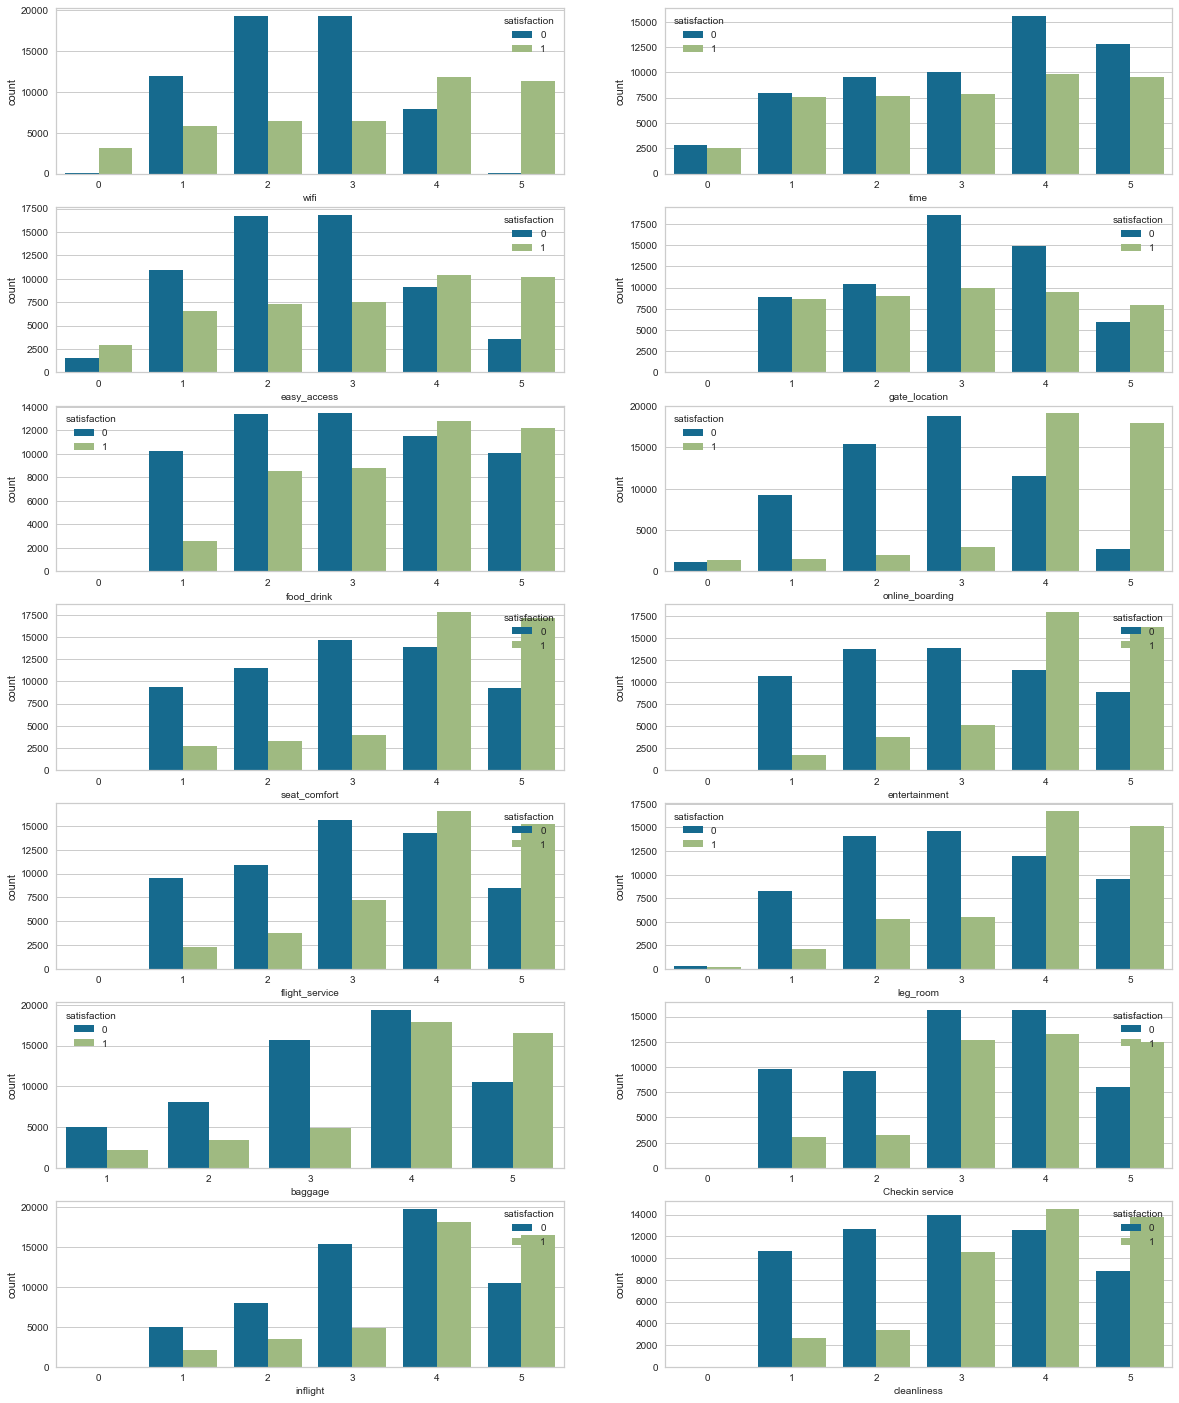

In [94]:
plt.figure(figsize=(20,25))

plotnumber = 1

for column in df.columns.tolist()[7:-3]:
    if plotnumber<=31 :
        ax = plt.subplot(7,2,plotnumber)
        sns.countplot(data=df, x=column, hue='satisfaction')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

jika dilihat dari data yang berbasis score terhadap satisfaction factor bahwa jika score semakin tinggi hampir semua data menunjukan semakin banyak penumpang yang puas

# Data Prepocessing

## Feature Selection

Pertama menggunakan correlation data antara semua features dengan label

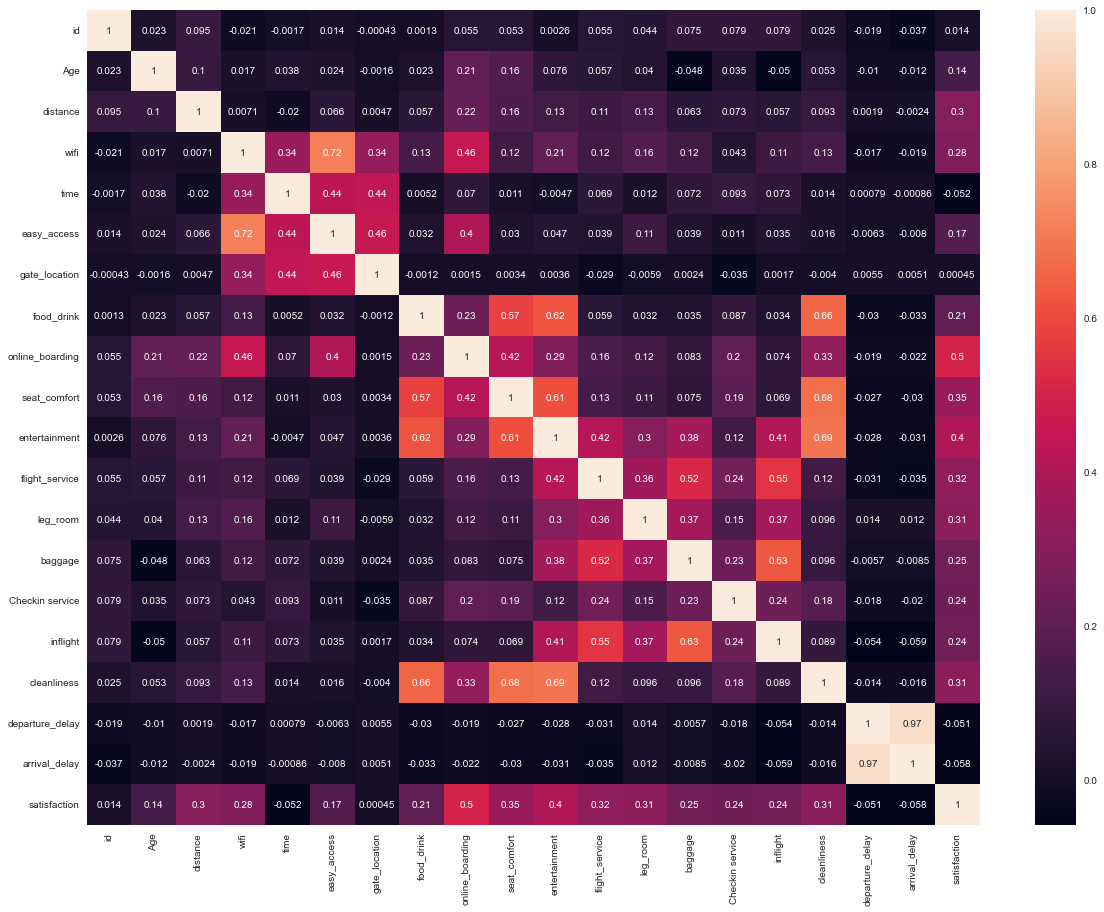

In [95]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(), annot=True)
plt.show()

berikutnya akan mencari tau menggunakan features importance RandomForest

In [96]:
dfCopy = df.copy()

obj_col = dfCopy.select_dtypes(include='object').columns.tolist()
num_col = dfCopy.select_dtypes(include=np.number).columns.tolist()

x = dfCopy[num_col].drop('satisfaction', axis=1)
y = dfCopy['satisfaction']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=8)
x_train = rf.fit(x_train, y_train)

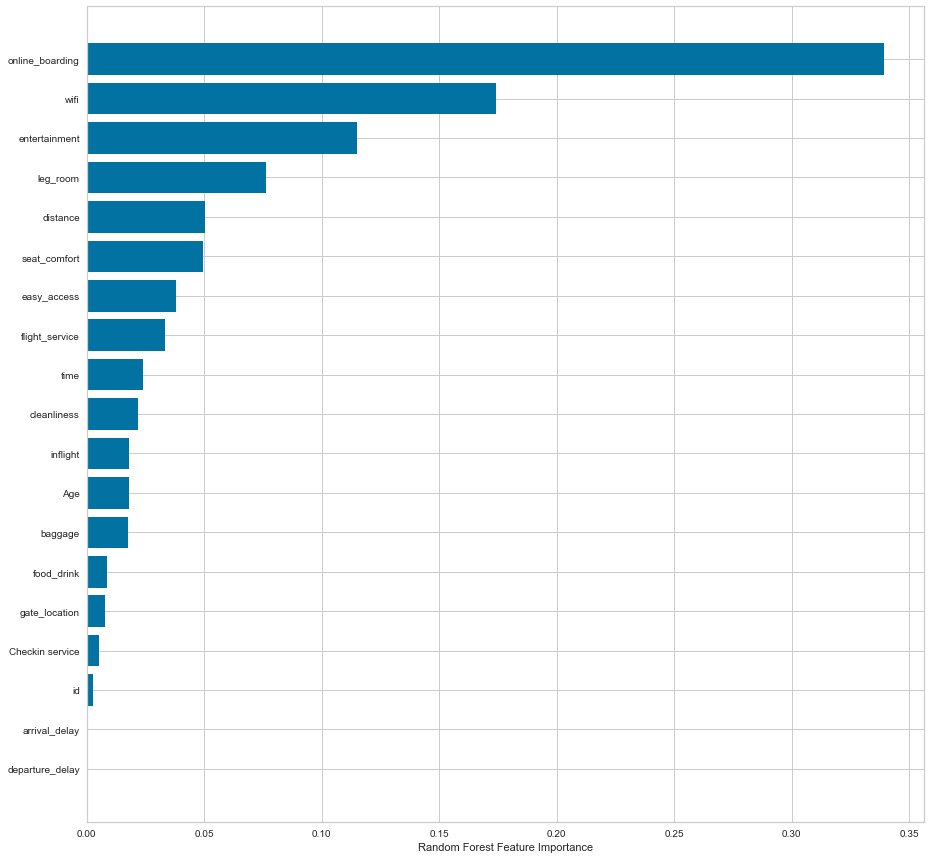

In [97]:
plt.figure(figsize=(15,15))

sorted_idx = rf.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

Dilihat dari nilai korelasi dan tingkatan features importance menggunakan randomforest saya akan mengambil data features dengan threshold korelasi sebesar 0.25.

In [98]:
dfNum = df[num_col]

tresh = 0.25 #making treshold
goodCorr = [] #membuat list untuk nantinya di masukan features dengan good correlation

for i in dfNum.columns.tolist():
    if dfNum['satisfaction'].corr(df[i]) >= tresh or dfNum['satisfaction'].corr(df[i]) <= -tresh:
        goodCorr.append(i)

Kolom yang mempunyai korelasi lebih besar dari 0.25 dan lebih kecil dari -0.25 adalah

In [99]:
goodCorr

['distance',
 'wifi',
 'online_boarding',
 'seat_comfort',
 'entertainment',
 'flight_service',
 'leg_room',
 'cleanliness',
 'satisfaction']

## Outliers Detection

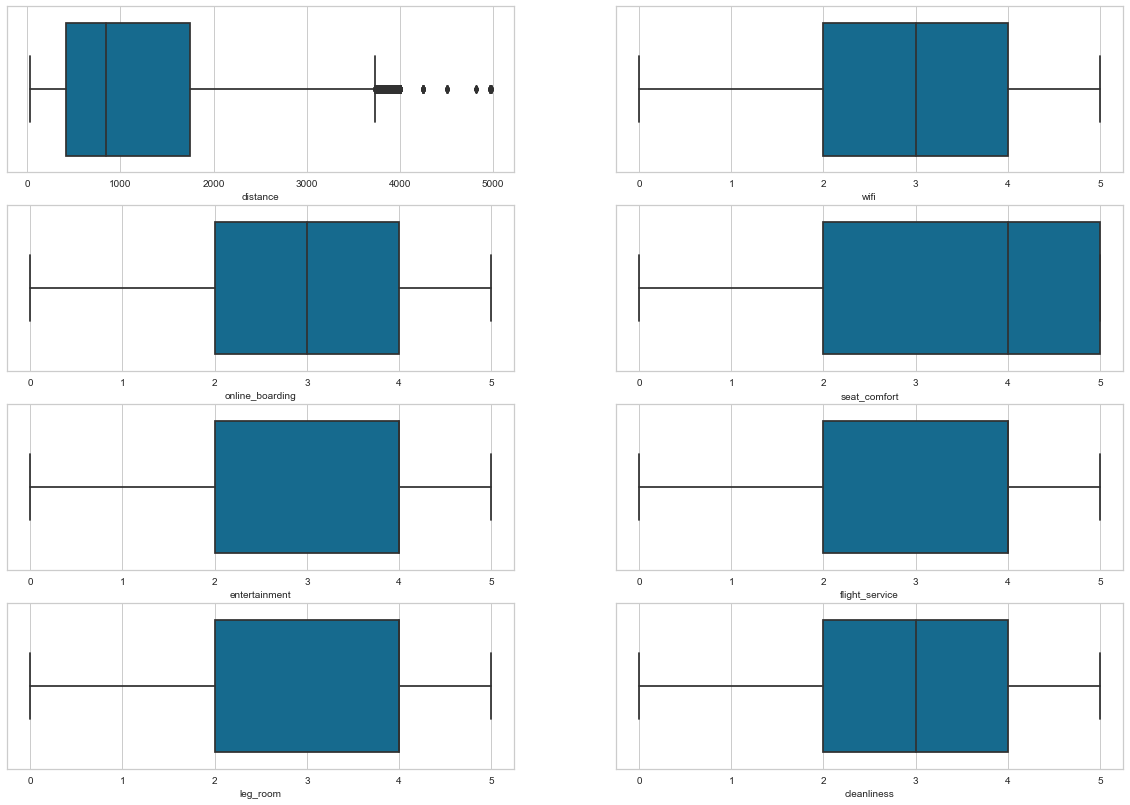

In [100]:
plt.figure(figsize=(20,25))

plotnumber = 1

for column in df[goodCorr].columns.tolist()[:-1]:
    if plotnumber<=31 :
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(data=df[goodCorr], x=column)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

terdapat hanya pada column distance yang memiliki beberapa outlier, mari kita coba lihat persebaran datanya untuk menentukan cara untuk handling

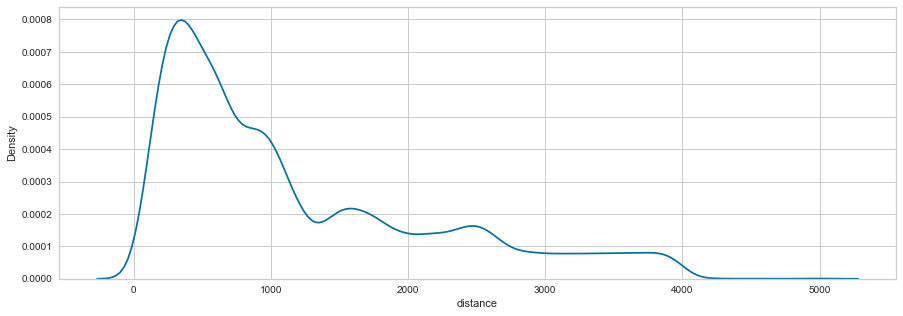

Skewness feature distance 1.1098858236331697


In [101]:
plt.figure(figsize=(15,5))

sns.kdeplot(data=df, x='distance')
plt.show()

print(f'Skewness feature distance {df.distance.skew()}')

nilai skewness > 0,5 ya menandakan data mengalami skewness

In [102]:
newData = df[goodCorr]

In [103]:
def find_skewed_boundaries(df, variable, distance): #defining function for detect outliers
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [104]:
upper, lower = find_skewed_boundaries(df, 'distance', 1.5)

In [105]:
outliers_dis = np.where(df['distance'] > upper, True, False)

In [106]:
newData = newData.loc[~(outliers_dis)]
# newData = newData.reset_index()
# newData = newData.drop('index', axis=1)

In [107]:
newData #new number data

,distance,wifi,online_boarding,seat_comfort,entertainment,flight_service,leg_room,cleanliness,satisfaction
0,460,3,3,5,5,4,3,5,0
1,235,3,3,1,1,1,5,1,0
2,1142,2,5,5,5,4,3,5,1
3,562,2,2,2,2,2,5,2,0
4,214,3,5,5,3,3,4,3,1
...,...,...,...,...,...,...,...,...,...
103589,192,2,2,2,2,3,1,2,0
103590,2347,4,4,5,5,5,5,4,1
103591,1995,1,1,5,4,3,2,4,0
103592,1000,1,1,1,1,4,5,1,0


Penggabungkan data dengan handling outliers dan obj column

In [108]:
df1 = pd.concat([df[obj_col].iloc[newData.index.tolist()], newData], axis=1)

In [109]:
df1 = df1.reset_index()
df1 = df1.drop('index', axis=1)

In [110]:
df1.head()

,Gender,Cust_type,travel_type,Class,distance,wifi,online_boarding,seat_comfort,entertainment,flight_service,leg_room,cleanliness,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,460,3,3,5,5,4,3,5,0
1,Male,disloyal Customer,Business travel,Business,235,3,3,1,1,1,5,1,0
2,Female,Loyal Customer,Business travel,Business,1142,2,5,5,5,4,3,5,1
3,Female,Loyal Customer,Business travel,Business,562,2,2,2,2,2,5,2,0
4,Male,Loyal Customer,Business travel,Business,214,3,5,5,3,3,4,3,1


In [111]:
x = df1.drop('satisfaction', axis=1)
y = df1['satisfaction']

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=8)

In [113]:
obj_coltrain = x_train.select_dtypes(include='object').columns.tolist() #categorical feature data type
num_coltrain = x_train.select_dtypes(include=np.number).columns.tolist() #numerical feature data type

In [114]:
num_coltrain

['distance',
 'wifi',
 'online_boarding',
 'seat_comfort',
 'entertainment',
 'flight_service',
 'leg_room',
 'cleanliness']

In [115]:
trf = ColumnTransformer(transformers=[
    ('number', StandardScaler(), num_coltrain),
    ('obj', OneHotEncoder(sparse=False), obj_coltrain)
], remainder='passthrough')

first_transform = trf.fit_transform(x_train)

#melihat hasil dari hasil tranform
pd.DataFrame(first_transform)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.979283,-2.059162,-2.396263,1.186856,1.234768,0.482755,1.258179,1.306366,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.114858,-1.304964,-1.656036,-0.326832,0.485849,0.482755,0.497722,-0.975085,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.440452,1.711825,0.564645,-1.840520,-1.760907,0.482755,-1.023192,-1.735568,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.709219,-0.550767,-0.915809,1.186856,1.234768,1.259114,-1.783649,1.306366,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.017244,-0.550767,0.564645,0.430012,1.234768,1.259114,-1.023192,0.545882,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91171,1.566262,0.203430,-0.915809,-1.083676,-0.263069,-0.293604,-0.262735,-0.975085,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
91172,-0.127876,0.203430,1.304871,0.430012,0.485849,0.482755,0.497722,0.545882,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
91173,-0.979283,0.203430,-0.175582,-1.840520,-1.760907,0.482755,1.258179,-1.735568,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
91174,0.027221,-0.550767,-0.175582,-1.840520,-1.760907,0.482755,-0.262735,-1.735568,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Pendefinisian Model

menggunakan pipeline untuk pendefinisian model supaya bisa tidak merusak dataset

## Logistic Regression

In [116]:
pipe_lr = Pipeline(steps=[
    ('tf', trf),
    ('model', LogisticRegression())
])

pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['distance', 'wifi',
                                                   'online_boarding',
                                                   'seat_comfort',
                                                   'entertainment',
                                                   'flight_service', 'leg_room',
                                                   'cleanliness']),
                                                 ('obj',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Cust_type',
                                                   'travel_type', 'Class'])])),
                ('model', LogisticRegression())])

## Decision Tree

In [117]:
pipe_tree = Pipeline(steps=[
    ('tf', trf),
    ('tree', DecisionTreeClassifier(max_depth=10))
])

pipe_tree.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['distance', 'wifi',
                                                   'online_boarding',
                                                   'seat_comfort',
                                                   'entertainment',
                                                   'flight_service', 'leg_room',
                                                   'cleanliness']),
                                                 ('obj',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Cust_type',
                                                   'travel_type', 'Class'])])),
                ('tree', DecisionTreeClassifier(max_depth=10))])

## Random Forest

In [118]:
pipe_rnf = Pipeline(steps=[
    ('tf', trf),
    ('RandomForest', RandomForestClassifier(n_estimators=100, max_depth=10))
])

pipe_rnf.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['distance', 'wifi',
                                                   'online_boarding',
                                                   'seat_comfort',
                                                   'entertainment',
                                                   'flight_service', 'leg_room',
                                                   'cleanliness']),
                                                 ('obj',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Cust_type',
                                                   'travel_type', 'Class'])])),
                ('RandomForest', RandomForestClassifier(max_depth=10))])

## KNN

In [119]:
pipe_knn = Pipeline(steps=[
    ('tf', trf),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipe_knn.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['distance', 'wifi',
                                                   'online_boarding',
                                                   'seat_comfort',
                                                   'entertainment',
                                                   'flight_service', 'leg_room',
                                                   'cleanliness']),
                                                 ('obj',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Cust_type',
                                                   'travel_type', 'Class'])])),
                ('knn', KNeighborsClassifier())])

## Gradient Boosting

In [120]:
pipe_grad = Pipeline(steps=[
    ('tf', trf),
    ('GradBoost', GradientBoostingClassifier(n_estimators=100, max_depth=2))
])

pipe_grad.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['distance', 'wifi',
                                                   'online_boarding',
                                                   'seat_comfort',
                                                   'entertainment',
                                                   'flight_service', 'leg_room',
                                                   'cleanliness']),
                                                 ('obj',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Cust_type',
                                                   'travel_type', 'Class'])])),
                ('GradBoost', GradientBoostingClassifier(max_depth=2))])

# Training Model

## Logistic Regression

In [121]:
y_lr = pipe_lr.predict(x_test)
print(f' score dari model Logistic Regression adalah {round(pipe_lr.score(x_test, y_test)*100 ,2)} % ')

 score dari model Logistic Regression adalah 86.07 % 


## Decision Tree

In [122]:
y_tree = pipe_tree.predict(x_test)
print(f' score dari model Decision Tree adalah {round(pipe_tree.score(x_test, y_test)*100 ,2)} % ')

 score dari model Decision Tree adalah 93.85 % 


## Random Forest

In [123]:
y_rnf = pipe_rnf.predict(x_test)
print(f' score dari model Random Forest adalah {round(pipe_rnf.score(x_test, y_test)*100 ,2)} % ')

 score dari model Random Forest adalah 93.98 % 


## KNN

In [124]:
y_knn= pipe_knn.predict(x_test)
print(f' score dari model KNeighbours Classifier adalah {round(pipe_knn.score(x_test, y_test)*100 ,2)} % ')

 score dari model KNeighbours Classifier adalah 92.34 % 


## Gradient Boosting

In [125]:
y_grad= pipe_grad.predict(x_test)
print(f' score dari model Gradient Boosting adalah {round(pipe_grad.score(x_test, y_test)*100 ,2)} % ')

 score dari model Gradient Boosting adalah 92.46 % 


# Model Evaluation

Karena data terbilang balance, maka kita bisa mengambil parameter akurasi untuk acuan model selection

## Logistic Regreesion

### Fit Obeservation

In [126]:
#check overfitt or not

print(f'Training Akurasi {round(pipe_lr.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_lr.score(x_test, y_test)*100,2)} %')

Training Akurasi 86.67 %
Testing Akurasi 86.07 %


### Confusion Matrix

Confusion matrix

 [[5224  631]
 [ 780 3496]]

True Positives(TP) =  5224

True Negatives(TN) =  3496

False Positives(FP) =  631

False Negatives(FN) =  780

All Positives 8720

All Positives 1411


<AxesSubplot:>

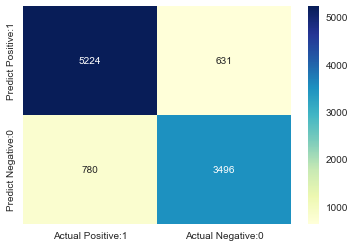

In [127]:
cm = confusion_matrix(y_test, y_lr)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print(f'\nAll Positives {cm[0,0] + cm[1,1]}')
print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### ROC-AUC Score

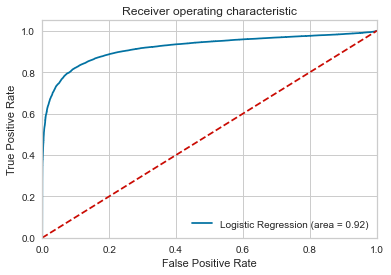

ROC AUC Score : 92.01 %


In [128]:
logit_roc_auc = roc_auc_score(y, pipe_lr.decision_function(x))
fpr, tpr, thresholds = roc_curve(y,pipe_lr.decision_function(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print(f'ROC AUC Score : {round(logit_roc_auc*100,2)} %')


### Classification Report

In [129]:
report = classification_report(y_test, y_lr)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5855
           1       0.85      0.82      0.83      4276

    accuracy                           0.86     10131
   macro avg       0.86      0.85      0.86     10131
weighted avg       0.86      0.86      0.86     10131



## Decision Tree

### Fit Observation

In [130]:
print(f'Training Akurasi {round(pipe_tree.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_tree.score(x_test, y_test)*100,2)} %')

Training Akurasi 94.54 %
Testing Akurasi 93.85 %


### Confusion Matrix

Confusion matrix

 [[5615  240]
 [ 383 3893]]

True Positives(TP) =  5615

True Negatives(TN) =  3893

False Positives(FP) =  240

False Negatives(FN) =  383

All Positives 9508

All Positives 623


<AxesSubplot:>

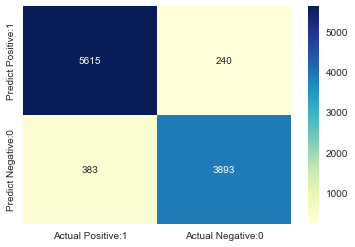

In [131]:
cm = confusion_matrix(y_test, y_tree)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print(f'\nAll Positives {cm[0,0] + cm[1,1]}')
print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### ROC-AUC Score

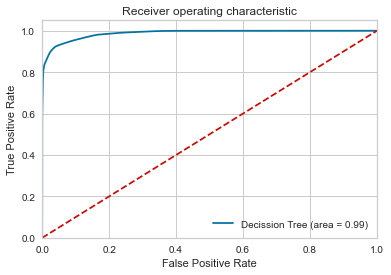

ROC AUC Score : 98.73 %


In [132]:
roc_auc = roc_auc_score(y, pipe_tree.predict_proba(x)[:, 1])
fpr, tpr, thresholds = roc_curve(y, pipe_tree.predict_proba(x)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Decission Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print(f'ROC AUC Score : {round(roc_auc*100,2)} %')


### Classification Report

In [133]:
report = classification_report(y_test, y_tree)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5855
           1       0.94      0.91      0.93      4276

    accuracy                           0.94     10131
   macro avg       0.94      0.93      0.94     10131
weighted avg       0.94      0.94      0.94     10131



## Random Forest

### Fit Observation

In [134]:
print(f'Training Akurasi {round(pipe_rnf.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_rnf.score(x_test, y_test)*100,2)} %')

Training Akurasi 94.37 %
Testing Akurasi 93.98 %


### Confusion Matrix

Confusion matrix

 [[5589  266]
 [ 344 3932]]

True Positives(TP) =  5589

True Negatives(TN) =  3932

False Positives(FP) =  266

False Negatives(FN) =  344

All Positives 9521

All Positives 610


<AxesSubplot:>

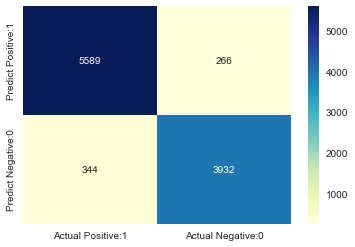

In [135]:
cm = confusion_matrix(y_test, y_rnf)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print(f'\nAll Positives {cm[0,0] + cm[1,1]}')
print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### ROC-AUC Score

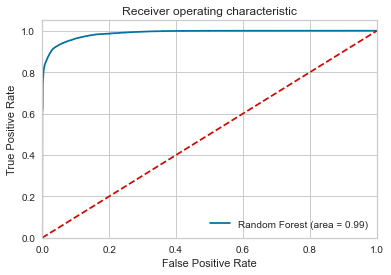

ROC AUC Score : 98.78 %


In [136]:
roc_auc = roc_auc_score(y, pipe_rnf.predict_proba(x)[:, 1])
fpr, tpr, thresholds = roc_curve(y, pipe_rnf.predict_proba(x)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'ROC AUC Score : {round(roc_auc*100,2)} %')


### Classification Report

In [137]:
report = classification_report(y_test, y_rnf)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5855
           1       0.94      0.92      0.93      4276

    accuracy                           0.94     10131
   macro avg       0.94      0.94      0.94     10131
weighted avg       0.94      0.94      0.94     10131



## KNN

### Fit Observation

In [138]:
print(f'Training Akurasi {round(pipe_knn.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_knn.score(x_test, y_test)*100,2)} %')

Training Akurasi 94.87 %
Testing Akurasi 92.34 %


### Confusion Matrix

Confusion matrix

 [[5595  260]
 [ 516 3760]]

True Positives(TP) =  5595

True Negatives(TN) =  3760

False Positives(FP) =  260

False Negatives(FN) =  516

All Positives 9355

All Positives 776


<AxesSubplot:>

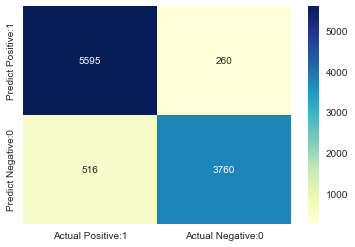

In [139]:
cm = confusion_matrix(y_test, y_knn)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print(f'\nAll Positives {cm[0,0] + cm[1,1]}')
print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### ROC-AUC Score

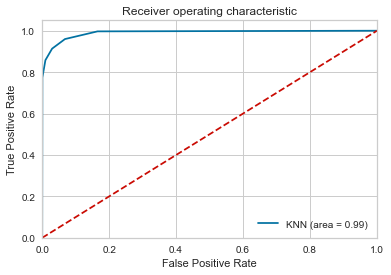

ROC AUC Score : 98.98 %


In [140]:
roc_auc = roc_auc_score(y, pipe_knn.predict_proba(x)[:, 1])
fpr, tpr, thresholds = roc_curve(y, pipe_knn.predict_proba(x)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'ROC AUC Score : {round(roc_auc*100,2)} %')


### Classification Report

In [141]:
report = classification_report(y_test, y_knn)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5855
           1       0.94      0.88      0.91      4276

    accuracy                           0.92     10131
   macro avg       0.93      0.92      0.92     10131
weighted avg       0.92      0.92      0.92     10131



## Gradient Boosting

### Fit Observation

In [142]:
#check overfitt or not

print(f'Training Akurasi {round(pipe_grad.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_grad.score(x_test, y_test)*100,2)} %')

Training Akurasi 93.01 %
Testing Akurasi 92.46 %


### Confusion Matrix

Confusion matrix

 [[5498  357]
 [ 407 3869]]

True Positives(TP) =  5498

True Negatives(TN) =  3869

False Positives(FP) =  357

False Negatives(FN) =  407

All Positives 9367

All Positives 764


<AxesSubplot:>

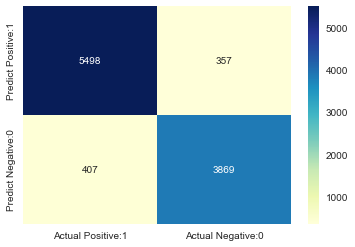

In [143]:
cm = confusion_matrix(y_test, y_grad)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print(f'\nAll Positives {cm[0,0] + cm[1,1]}')
print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### ROC-AUC Score

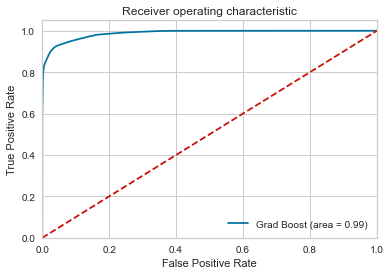

ROC AUC Score : 98.73 %


In [144]:
roc_auc = roc_auc_score(y, pipe_tree.predict_proba(x)[:, 1])
fpr, tpr, thresholds = roc_curve(y, pipe_tree.predict_proba(x)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Grad Boost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'ROC AUC Score : {round(roc_auc*100,2)} %')


### Classification Report

In [145]:
report = classification_report(y_test, y_grad)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5855
           1       0.92      0.90      0.91      4276

    accuracy                           0.92     10131
   macro avg       0.92      0.92      0.92     10131
weighted avg       0.92      0.92      0.92     10131



# Hyperparameter Tuning

## Logistic Regression

In [146]:
logparam_grid = [
    {'model__penalty' : ['l1', 'l2'], 'model__C':[0.1, 0.5, 0.7, 1]}
  ]

In [147]:
grid_searchlog = GridSearchCV(pipe_lr, param_grid= logparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchlog.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['distance',
                                                                          'wifi',
                                                                          'online_boarding',
                                                                          'seat_comfort',
                                                                          'entertainment',
                                                                          'flight_service',
                                                                          'leg_room',
         

In [148]:
grid_searchlog.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['distance', 'wifi',
                                                   'online_boarding',
                                                   'seat_comfort',
                                                   'entertainment',
                                                   'flight_service', 'leg_room',
                                                   'cleanliness']),
                                                 ('obj',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Cust_type',
                                                   'travel_type', 'Class'])])),
                ('model', LogisticRegression(C=0.1))])

Best Parameter untuk logistic regression adalah :
- penalty : l2
- C = 0.1

In [149]:
log_final = grid_searchlog.best_estimator_

log_pred = log_final.predict(x_test)
print(f'Akurasi test Logistic regression setelah melakukan Hyperparameter Tuning {round(log_final.score(x_test,y_test),2)*100} %')

Akurasi test Logistic regression setelah melakukan Hyperparameter Tuning 86.0 %


In [150]:
roc_auc = roc_auc_score(y_train, log_final.predict_proba(x_train)[:, 1])
print(f'ROC AUC Score : {round(roc_auc*100,2)} %')

ROC AUC Score : 92.03 %


In [151]:
report = classification_report(y_test, log_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5855
           1       0.85      0.82      0.83      4276

    accuracy                           0.86     10131
   macro avg       0.86      0.86      0.86     10131
weighted avg       0.86      0.86      0.86     10131



## Decision Tree

In [152]:
treeparam_grid = [
    {'tree__criterion' : ['gini', 'entropy'], 'tree__max_depth':[1, 3, 5, 7, 10]}
  ]

In [153]:
grid_searchtree = GridSearchCV(pipe_tree, param_grid= treeparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchtree.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['distance',
                                                                          'wifi',
                                                                          'online_boarding',
                                                                          'seat_comfort',
                                                                          'entertainment',
                                                                          'flight_service',
                                                                          'leg_room',
         

In [154]:
grid_searchtree.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['distance', 'wifi',
                                                   'online_boarding',
                                                   'seat_comfort',
                                                   'entertainment',
                                                   'flight_service', 'leg_room',
                                                   'cleanliness']),
                                                 ('obj',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Cust_type',
                                                   'travel_type', 'Class'])])),
                ('tree', DecisionTreeClassifier(max_depth=10))])

Best Parameter untuk logistic regression adalah :
- Criterion : gini
- Max Depth = 10

In [155]:
tree_final = grid_searchtree.best_estimator_

tree_predict = tree_final.predict(x_test)
print(f'Akurasi test Decision Tree setelah melakukan Hyperparameter Tuning {round(tree_final.score(x_test,y_test),2)*100} %')

Akurasi test Decision Tree setelah melakukan Hyperparameter Tuning 94.0 %


In [156]:
roc_auc = roc_auc_score(y_train, tree_final.predict_proba(x_train)[:, 1])
print(f'ROC AUC Score : {round(roc_auc*100,2)} %')

ROC AUC Score : 98.78 %


In [157]:
report = classification_report(y_test, tree_predict)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5855
           1       0.94      0.91      0.93      4276

    accuracy                           0.94     10131
   macro avg       0.94      0.93      0.94     10131
weighted avg       0.94      0.94      0.94     10131



## Random Forest

In [158]:
rnfparam_grid = [
    {'RandomForest__n_estimators' : [100,110,120,130,140,150], 'RandomForest__max_depth':[1, 3, 5, 7, 1]}
  ]

In [159]:
#grid search untuk accuracy

grid_searchrnf = GridSearchCV(pipe_rnf, param_grid= rnfparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchrnf.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['distance',
                                                                          'wifi',
                                                                          'online_boarding',
                                                                          'seat_comfort',
                                                                          'entertainment',
                                                                          'flight_service',
                                                                          'leg_room',
         

In [160]:
grid_searchrnf.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['distance', 'wifi',
                                                   'online_boarding',
                                                   'seat_comfort',
                                                   'entertainment',
                                                   'flight_service', 'leg_room',
                                                   'cleanliness']),
                                                 ('obj',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Cust_type',
                                                   'travel_type', 'Class'])])),
                ('RandomForest',
                 RandomForestClassifier(max_depth=7, n_estimators=130))])

Best Parameter untuk logistic regression adalah :
- Max depth : l2
- n_estimators = 0.7

In [161]:
rnf_final = grid_searchrnf.best_estimator_

rnf_pred = rnf_final.predict(x_test)
print(f'Akurasi test Decision Tree setelah melakukan Hyperparameter Tuning {round(rnf_final.score(x_test,y_test),2)*100} %')

Akurasi test Decision Tree setelah melakukan Hyperparameter Tuning 93.0 %


In [162]:
roc_auc = roc_auc_score(y_test, rnf_final.predict_proba(x_test)[:, 1])
print(f'ROC AUC Score : {round(roc_auc*100,2)} %')

ROC AUC Score : 97.96 %


In [163]:
report = classification_report(y_test, rnf_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5855
           1       0.92      0.91      0.91      4276

    accuracy                           0.93     10131
   macro avg       0.93      0.92      0.93     10131
weighted avg       0.93      0.93      0.93     10131



## KNN

In [164]:
knnparam_grid = [
    {'knn__n_neighbors' : [3, 5, 10]}
  ]

In [165]:
#grid search untuk accuracy

grid_searchknn = GridSearchCV(pipe_knn, param_grid= knnparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchknn.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['distance',
                                                                          'wifi',
                                                                          'online_boarding',
                                                                          'seat_comfort',
                                                                          'entertainment',
                                                                          'flight_service',
                                                                          'leg_room',
         

In [166]:
grid_searchknn.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['distance', 'wifi',
                                                   'online_boarding',
                                                   'seat_comfort',
                                                   'entertainment',
                                                   'flight_service', 'leg_room',
                                                   'cleanliness']),
                                                 ('obj',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Cust_type',
                                                   'travel_type', 'Class'])])),
                ('knn', KNeighborsClassifier())])

In [167]:
knn_final = grid_searchknn.best_estimator_

knn_pred = knn_final.predict(x_test)
print(f'Akurasi test Decision Tree setelah melakukan Hyperparameter Tuning {round(knn_final.score(x_test,y_test),2)*100} %')

Akurasi test Decision Tree setelah melakukan Hyperparameter Tuning 92.0 %


In [168]:
roc_auc = roc_auc_score(y_test, knn_final.predict_proba(x_test)[:, 1])
print(f'ROC AUC Score : {round(roc_auc*100,2)} %')

ROC AUC Score : 96.79 %


In [169]:
report = classification_report(y_test, knn_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5855
           1       0.94      0.88      0.91      4276

    accuracy                           0.92     10131
   macro avg       0.93      0.92      0.92     10131
weighted avg       0.92      0.92      0.92     10131



## Gradient Boosting

In [170]:
gradparam_grid = [
    {'GradBoost__n_estimators' : [100,120,13,150], 'GradBoost__learning_rate':[0.1, 0.5, 1]}
  ]

In [171]:
#grid search untuk accuracy

grid_searchgrad = GridSearchCV(pipe_grad, param_grid= gradparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchgrad.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['distance',
                                                                          'wifi',
                                                                          'online_boarding',
                                                                          'seat_comfort',
                                                                          'entertainment',
                                                                          'flight_service',
                                                                          'leg_room',
         

In [172]:
grid_searchgrad.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['distance', 'wifi',
                                                   'online_boarding',
                                                   'seat_comfort',
                                                   'entertainment',
                                                   'flight_service', 'leg_room',
                                                   'cleanliness']),
                                                 ('obj',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Cust_type',
                                                   'travel_type', 'Class'])])),
                ('GradBoost',
                 GradientBoostingClassifier(learning_rate=1, max_depth=2,
                    

In [173]:
grad_final = grid_searchgrad.best_estimator_

grad_pred = grad_final.predict(x_test)
print(f'Akurasi test Decision Tree setelah melakukan Hyperparameter Tuning {round(grad_final.score(x_test,y_test),2)*100} %')

Akurasi test Decision Tree setelah melakukan Hyperparameter Tuning 94.0 %


In [174]:
roc_auc = roc_auc_score(y_test, grad_final.predict_proba(x_test)[:, 1])
print(f'ROC AUC Score : {round(roc_auc*100,2)} %')

ROC AUC Score : 98.65 %


In [175]:
report = classification_report(y_test, grad_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5855
           1       0.94      0.91      0.93      4276

    accuracy                           0.94     10131
   macro avg       0.94      0.93      0.94     10131
weighted avg       0.94      0.94      0.94     10131



Karena data Balance,saya akan memerhatikan dan membandingkan akurasi score sebelum dan hyper parameter tuning. Ternyata akurasi terbaik adalah dengan menggunakan Gradient Boosting dengan hyperparameter learning_rate = 1, max_depth =2, n_estimators=150

In [208]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", trf),
        ("GradBoost", GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=150))
    ])

full_pipeline_with_predictor.fit(x, y)

Pipeline(steps=[('preparation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['distance', 'wifi',
                                                   'online_boarding',
                                                   'seat_comfort',
                                                   'entertainment',
                                                   'flight_service', 'leg_room',
                                                   'cleanliness']),
                                                 ('obj',
                                                  OneHotEncoder(sparse=False),
                                                  ['Gender', 'Cust_type',
                                                   'travel_type', 'Class'])])),
                ('GradBoost',
                 GradientBoostingClassifier(learning_rate=1, max_depth=2,
           

In [209]:
my_model = full_pipeline_with_predictor

# Testing Dataset

## Treating Data Test same as Train Data

In [201]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [202]:
df_test = df_test.rename(columns={
    'Customer Type' : 'Cust_type',
    'Type of Travel' : 'travel_type',
    'Flight Distance' : 'distance',
    'Inflight wifi service' : 'wifi',
    'Departure/Arrival time convenient' : 'time',
    'Ease of Online booking' : 'easy_access',
    'Gate location' : 'gate_location',
    'Food and drink' : 'food_drink',
    'Online boarding' : 'online_boarding',
    'Seat comfort' : 'seat_comfort',
    'Inflight entertainment' : 'entertainment',
    'On-board service' : 'flight_service',
    'Leg room service' : 'leg_room',
    'Baggage handling' : 'baggage',
    'Checkin serivice' : 'checkin',
    'Inflight service' : 'inflight',
    'Cleanliness' : 'cleanliness',
    'Departure Delay in Minutes' : 'departure_delay',
    'Arrival Delay in Minutes' : 'arrival_delay'
})

In [203]:
df_test.isnull().mean()*100

Unnamed: 0         0.000000
id                 0.000000
Gender             0.000000
Cust_type          0.000000
Age                0.000000
travel_type        0.000000
Class              0.000000
distance           0.000000
wifi               0.000000
time               0.000000
easy_access        0.000000
gate_location      0.000000
food_drink         0.000000
online_boarding    0.000000
seat_comfort       0.000000
entertainment      0.000000
flight_service     0.000000
leg_room           0.000000
baggage            0.000000
Checkin service    0.000000
inflight           0.000000
cleanliness        0.000000
departure_delay    0.000000
arrival_delay      0.319526
satisfaction       0.000000
dtype: float64

In [204]:
df_test = df_test.dropna(subset=['arrival_delay'])
df_test = df_test.reset_index()
df_test = df_test.drop(['index','Unnamed: 0'], axis=1)
df_test.head()


,id,Gender,Cust_type,Age,travel_type,Class,distance,wifi,time,easy_access,...,entertainment,flight_service,leg_room,baggage,Checkin service,inflight,cleanliness,departure_delay,arrival_delay,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [205]:
newDataTest = df_test[goodCorr]
newDataTest.head()

,distance,wifi,online_boarding,seat_comfort,entertainment,flight_service,leg_room,cleanliness,satisfaction
0,160,5,4,3,5,5,5,5,satisfied
1,2863,1,4,5,4,4,4,5,satisfied
2,192,2,2,2,2,4,1,2,neutral or dissatisfied
3,3377,0,4,4,1,1,1,4,satisfied
4,1182,2,1,2,2,2,2,4,satisfied


In [206]:
df2 = pd.concat([df_test[obj_col].iloc[newDataTest.index.tolist()], newDataTest], axis=1)
df2 = df2.reset_index()
df2 = df2.drop('index', axis=1)

df2.head()

,Gender,Cust_type,travel_type,Class,distance,wifi,online_boarding,seat_comfort,entertainment,flight_service,leg_room,cleanliness,satisfaction
0,Female,Loyal Customer,Business travel,Eco,160,5,4,3,5,5,5,5,satisfied
1,Female,Loyal Customer,Business travel,Business,2863,1,4,5,4,4,4,5,satisfied
2,Male,disloyal Customer,Business travel,Eco,192,2,2,2,2,4,1,2,neutral or dissatisfied
3,Male,Loyal Customer,Business travel,Business,3377,0,4,4,1,1,1,4,satisfied
4,Female,Loyal Customer,Business travel,Eco,1182,2,1,2,2,2,2,4,satisfied


In [207]:
df2['satisfaction'] = df2['satisfaction'].map({
    'satisfied' : 1,
    'neutral or dissatisfied' : 0
})

df2.head()

,Gender,Cust_type,travel_type,Class,distance,wifi,online_boarding,seat_comfort,entertainment,flight_service,leg_room,cleanliness,satisfaction
0,Female,Loyal Customer,Business travel,Eco,160,5,4,3,5,5,5,5,1
1,Female,Loyal Customer,Business travel,Business,2863,1,4,5,4,4,4,5,1
2,Male,disloyal Customer,Business travel,Eco,192,2,2,2,2,4,1,2,0
3,Male,Loyal Customer,Business travel,Business,3377,0,4,4,1,1,1,4,1
4,Female,Loyal Customer,Business travel,Eco,1182,2,1,2,2,2,2,4,1


## Result

In [211]:
x2 = df2.drop('satisfaction', axis=1)
y2 = df2['satisfaction']

In [212]:
test_pred = my_model.predict(x2)

In [214]:
report = classification_report(y2, test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14528
           1       0.95      0.92      0.93     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893



Hasilnya dengan data set train dan test, akurasi model mendapatkan 94%

# CLUSTERING

## Optimum Number of Clusters

In [178]:
clusteringData = trf.fit_transform(x)
clusteringData = pd.DataFrame(clusteringData)

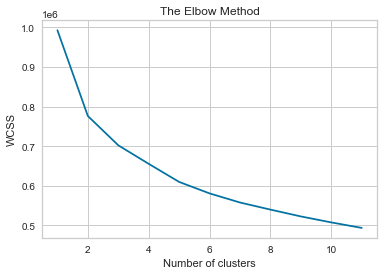

In [179]:
wcss=[]
for i in range (1,12):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(clusteringData)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

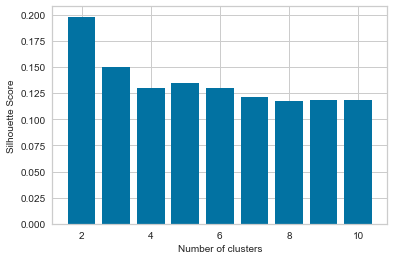

In [180]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(clusteringData, KMeans(n_clusters = n_cluster).fit_predict(clusteringData))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

Dari hasil 2 metode pencarian nilai optimum jumlah clusters, didapati bahwa nilai yang paling baik adalah membagi data menjadi 2 cluster

## Defining, Training, & Evaluating Model

In [181]:
clust = KMeans(2)
clust.fit(clusteringData)

KMeans(n_clusters=2)

In [182]:
label = clust.predict(clusteringData)

In [183]:
clust_df = kmeans_df = pd.concat([df1, pd.DataFrame({'cluster' : label})], axis=1)

In [184]:
clust_df.head()

,Gender,Cust_type,travel_type,Class,distance,wifi,online_boarding,seat_comfort,entertainment,flight_service,leg_room,cleanliness,satisfaction,cluster
0,Male,Loyal Customer,Personal Travel,Eco Plus,460,3,3,5,5,4,3,5,0,1
1,Male,disloyal Customer,Business travel,Business,235,3,3,1,1,1,5,1,0,0
2,Female,Loyal Customer,Business travel,Business,1142,2,5,5,5,4,3,5,1,1
3,Female,Loyal Customer,Business travel,Business,562,2,2,2,2,2,5,2,0,0
4,Male,Loyal Customer,Business travel,Business,214,3,5,5,3,3,4,3,1,1


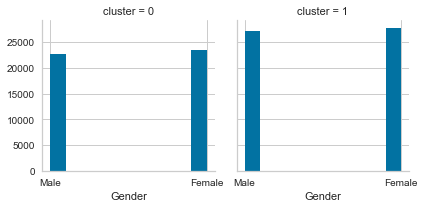

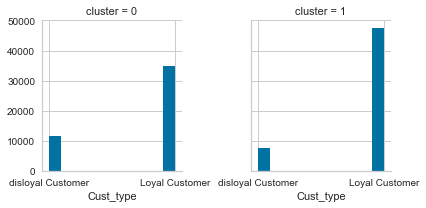

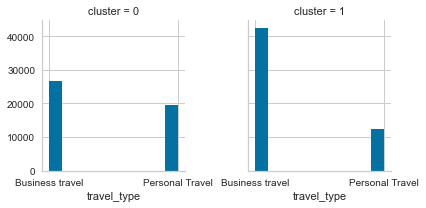

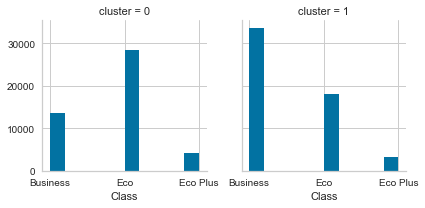

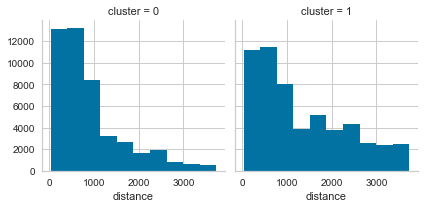

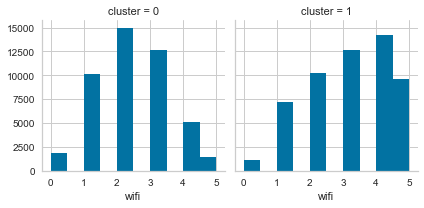

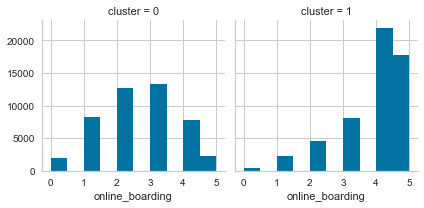

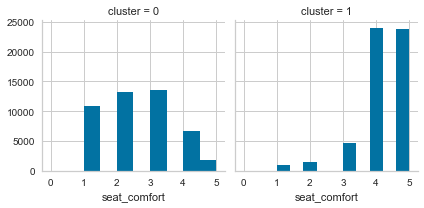

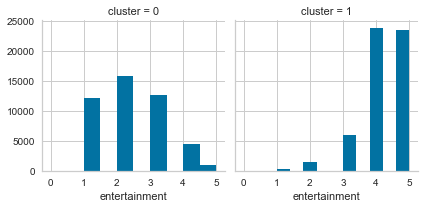

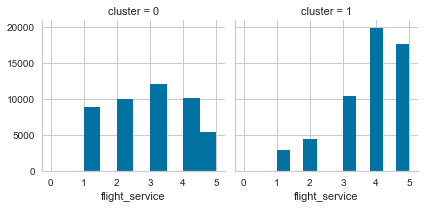

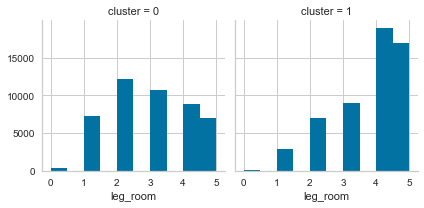

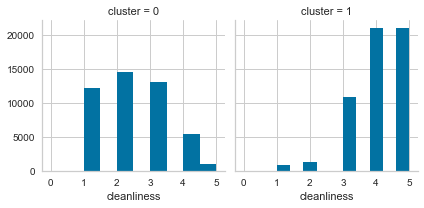

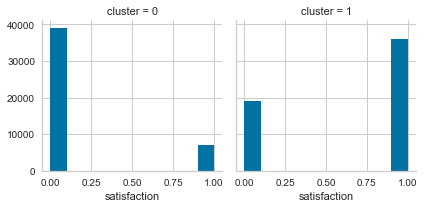

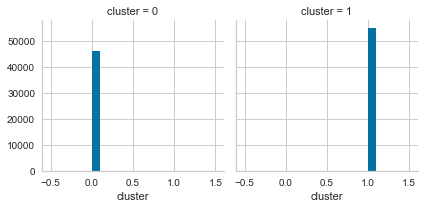

In [185]:
for c in clust_df:
    grid= sns.FacetGrid(clust_df, col='cluster')
    grid.map(plt.hist, c)

Dari Hasil Clusterin di atas, didapati bahwa karakteristik cluster sebagai berikut :

- Cluster 0 : adalah penumpang memberikan penilaian pengalaman baik, dilihat dari data yang mengandung satisfaction level semuanya banyak terdistribusi pada angka 4 dan 5

- Cluster 1 : adalah penumpang yang memiliki pengalaman terbang yang tidak sebaik cluster 1, cluster inilah yang harus di pantau dan dijadikan bahan evaluasi airlines untuk bisa meningkatkan service

## Cluster Distribution

In [186]:
pca = PCA(n_components=2)
kmeans_pca = pca.fit_transform(clusteringData)
kmeans_pca = pd.DataFrame(kmeans_pca)
kmeans_pca.columns = ['P1', 'P2'] 
kmeans_pca.head()

,P1,P2
0,-1.508467,1.468141
1,2.720464,-1.426185
2,-2.291517,0.868906
3,1.784818,-0.943129
4,-0.863002,0.123697


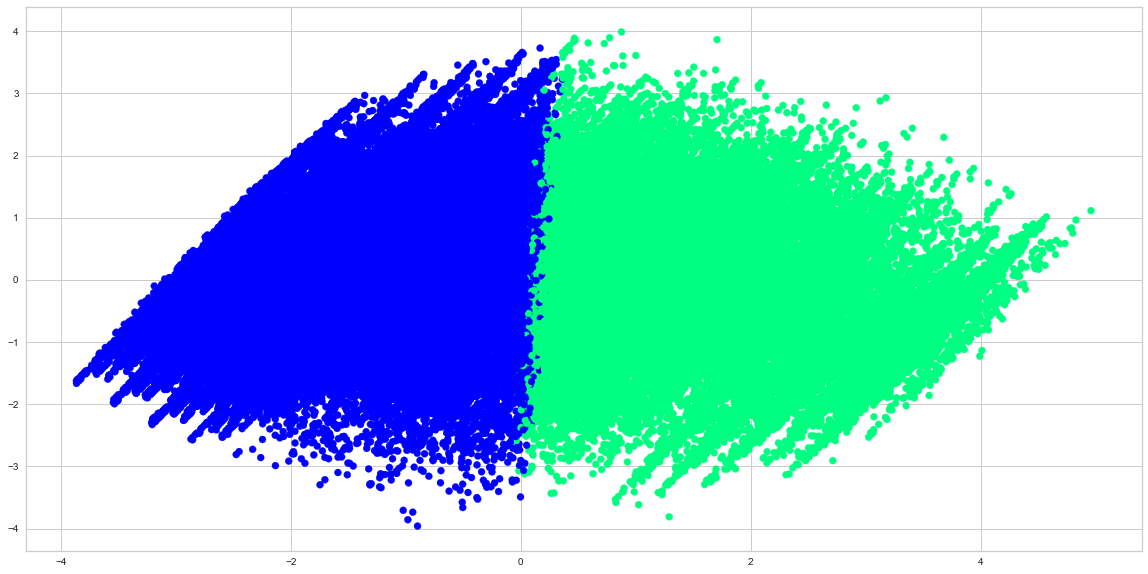

In [187]:
plt.figure(figsize=(20,10))

plt.scatter(kmeans_pca['P1'], kmeans_pca['P2'],  
           c = KMeans(n_clusters = 2).fit_predict(clusteringData), cmap =plt.cm.winter) 
plt.show() 

grafik diatas adalah representasi cluster yang telah dilakukan

# Model Export

In [215]:
import joblib
joblib.dump(my_model, "my_model_final.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model_final.pkl") # DIFF

# Kesimpulan

## Model Analysis

Setelah Melakukan feature selection dengan berdasarkan point EDA dan parameter parameter lainnya untuk menentukan class pada dataset ini model terbaik yang bisa digunakan adalah model `Gradient Boosting` dengan default neighbours yaitu Learning Rate =1, n_estimators = 150. 

Mengapa saya menentukan model KNN yang terbaik jika dibandingkan dengan yang lain adalah dilihat dari Classification report dan nilai ROC-Area Under Curved yang sangat baik yaitu :
- Akurasi = 94%
- F1-Score = 95%
- ROC-Auc = 98%
- Time Cost = 3 Menit untuk penggunaan GridCV Hyperparameter Tuning


Dan Untuk Clustering, setelah mencari cluster yang terbaik dengan feature yang sudah ditentukan pada saat Data Preprocessing, dapat didapati bahwa ada `2` cluster yang bisa menjadi perhatian perusahaan untuk meningkatkan service bahkan penjualan tiket :

- Cluster 0 : adalah penumpang memberikan penilaian pengalaman baik, dilihat dari data yang mengandung satisfaction level semuanya banyak terdistribusi pada angka 4 dan 5

- Cluster 1 : adalah penumpang yang memiliki pengalaman terbang yang tidak sebaik cluster 1, cluster inilah yang harus di pantau dan dijadikan bahan evaluasi airlines untuk bisa meningkatkan service

Dengan berfokus pada penumpang dan features pada cluster 1, pihak perusahaan bisa memberikan service yang lebih tinggi dan mendapati penumpang Loyal lebih banyak lagi

## Overall Analysis

Dataset ini adalah dataset yang cukup baik dan mudah untuk melakukan Classifaction dan Clustering karena tidak banyak data outliers dan Missing value yang terdapat pada dataset penerbangan ini.

Selain itu dataset ini memiliki target yang seimbang antara Satisfied dan Neutral, yang dimana tidak perlu lagi menggunakan metode balancing data yang bisa saja menjadikan data bias.

Dari hasil Classification dan Clustering yang telah saya lakukan, harapannya adalah perusahan bisa memberikan perhatian lebih terhadap penumpang yang Neutral dan tidak puas serta memberika penilaian service yang kurang baik yang mungkin bisa meningkatkan pendapatan dari perusahaan itu sendiri